## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rafanpradipta/week3-preprocessing")

print("Path to dataset files:", path)

100%|██████████| 1.45k/1.45k [00:00<00:00, 604kB/s]

Extracting files...
Path to dataset files: C:\Users\Abiyoso\.cache\kagglehub\datasets\rafanpradipta\week3-preprocessing\versions\1


In [4]:
df = pd.read_csv(path + "/hands_on_preprocessing_dummy.csv")

## EDA

In [5]:
df.head()

,ID,Age,Income,Credit_Score,Employment_Status,Education_Level,Loan_Approval
0,1,56,81228.0,673.0,Unemployed,High School,0
1,2,69,68984.0,771.0,Employed,PhD,1
2,3,46,60774.0,532.0,Self-Employed,PhD,0
3,4,32,NaN,412.0,Employed,Bachelor,0
4,5,60,82592.0,796.0,Employed,Master,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 100 non-null    int64  
 1   Age                100 non-null    int64  
 2   Income             91 non-null     float64
 3   Credit_Score       95 non-null     float64
 4   Employment_Status  100 non-null    object 
 5   Education_Level    100 non-null    object 
 6   Loan_Approval      100 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [7]:
df.isnull().sum()

ID                   0
Age                  0
Income               9
Credit_Score         5
Employment_Status    0
Education_Level      0
Loan_Approval        0
dtype: int64

### Missing Value Visualization

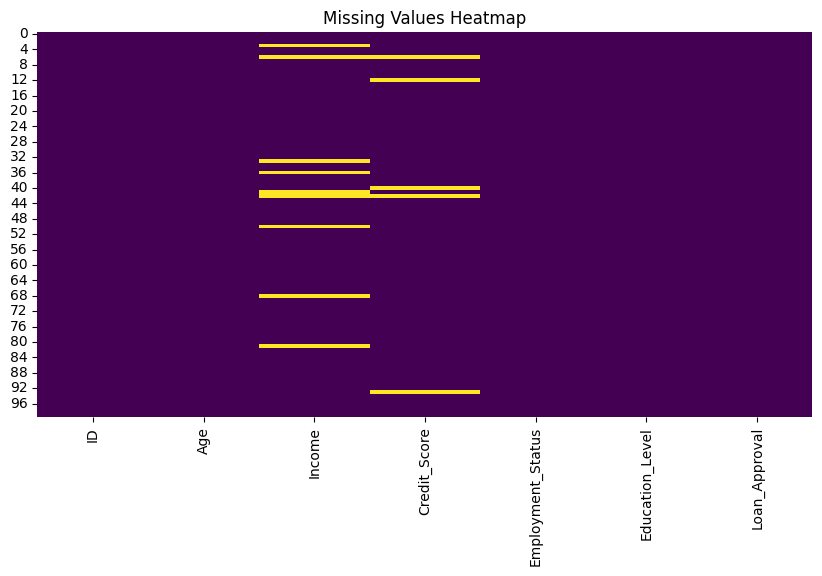

In [8]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### Visualization of unique value per column

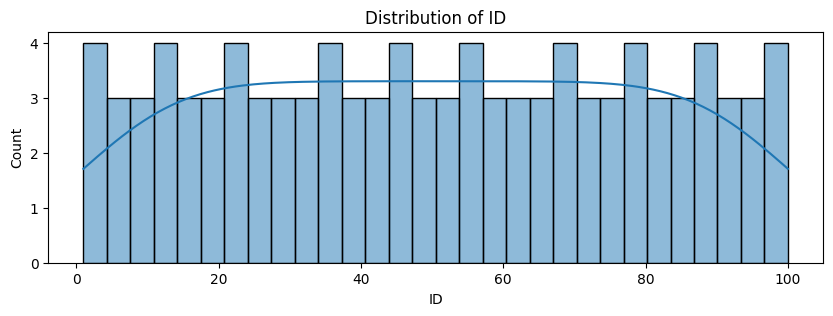

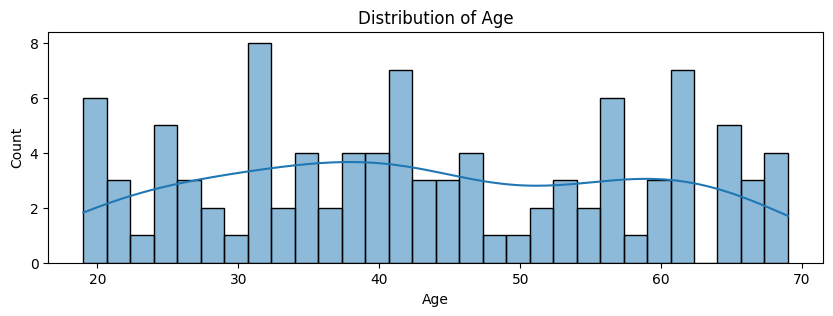

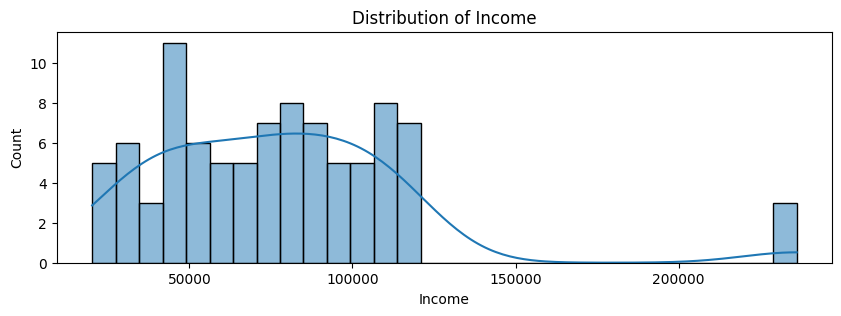

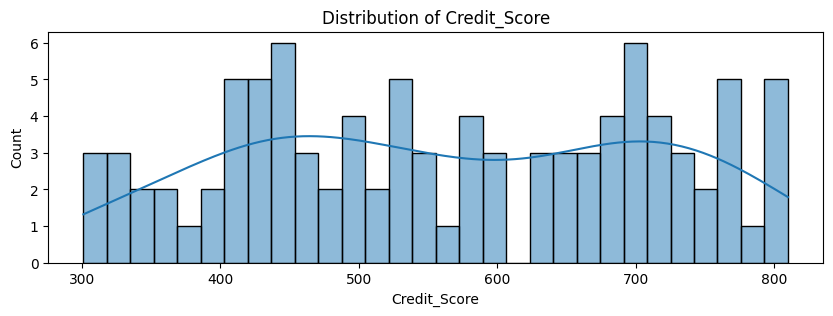

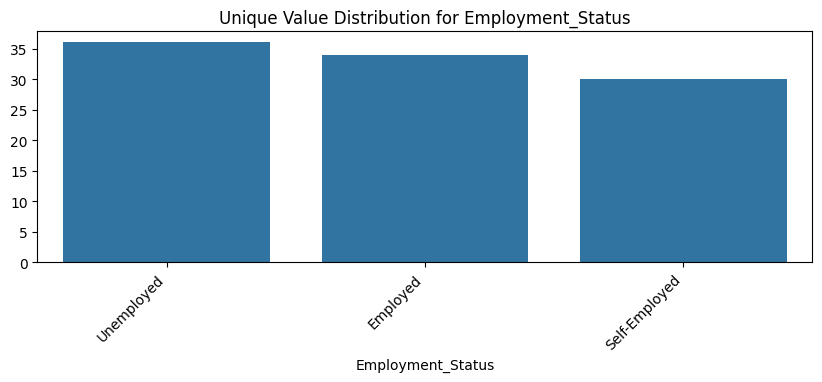

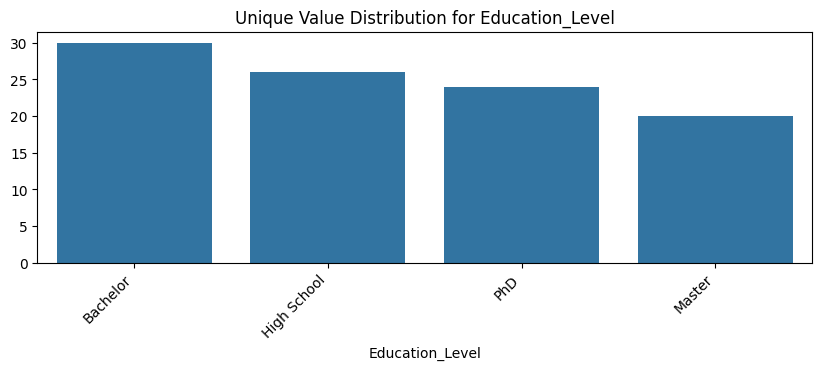

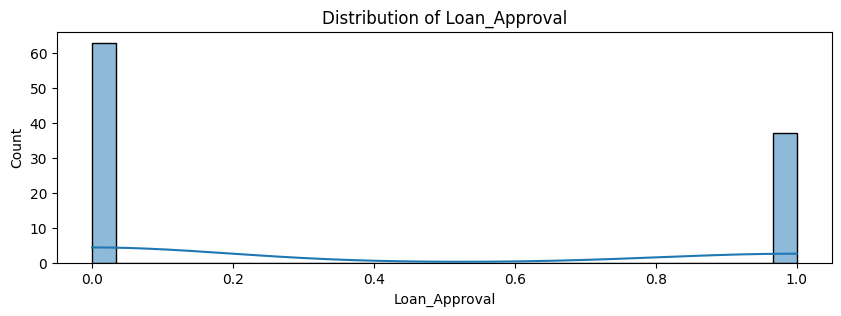

In [9]:
for col in df.columns:
    if df[col].dtype == 'object':
        plt.figure(figsize=(10, 3))
        sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
        plt.xticks(rotation=45, ha='right')
        plt.title(f"Unique Value Distribution for {col}")
        plt.show()
    else:
        plt.figure(figsize=(10, 3))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

### Check if there is an outlier

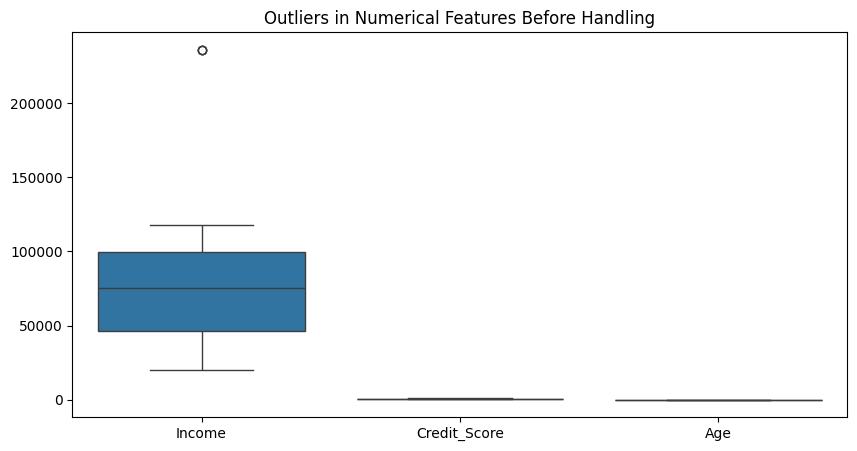

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Income', 'Credit_Score', 'Age']])
plt.title("Outliers in Numerical Features Before Handling")
plt.show()

## Preprocessing

### Handling Missing Value

In [11]:
imputer = SimpleImputer(strategy='mean')
df[['Income', 'Credit_Score']] = imputer.fit_transform(df[['Income', 'Credit_Score']])

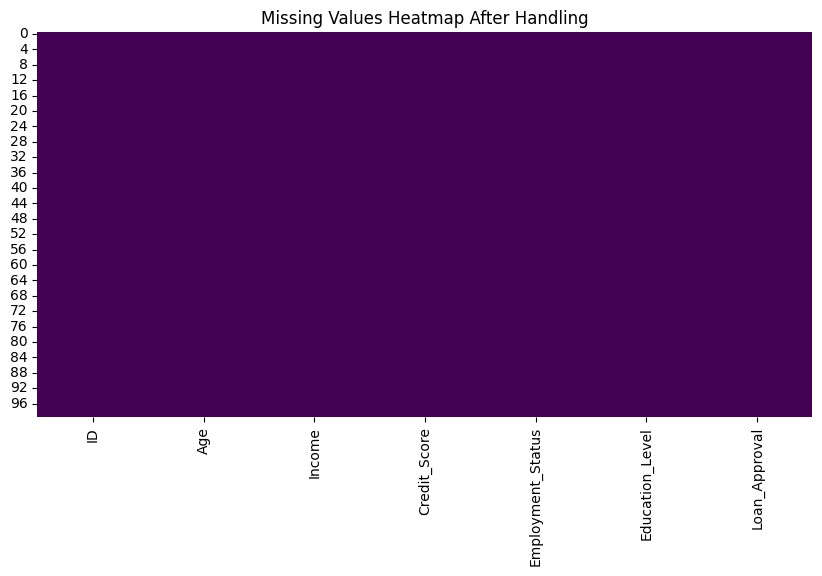

In [12]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap After Handling")
plt.show()

### Handling Outlier

In [13]:
numerical_features = ['Income', 'Credit_Score', 'Age']
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[numerical_features] = df[numerical_features].clip(lower=lower_bound, upper=upper_bound, axis=1)

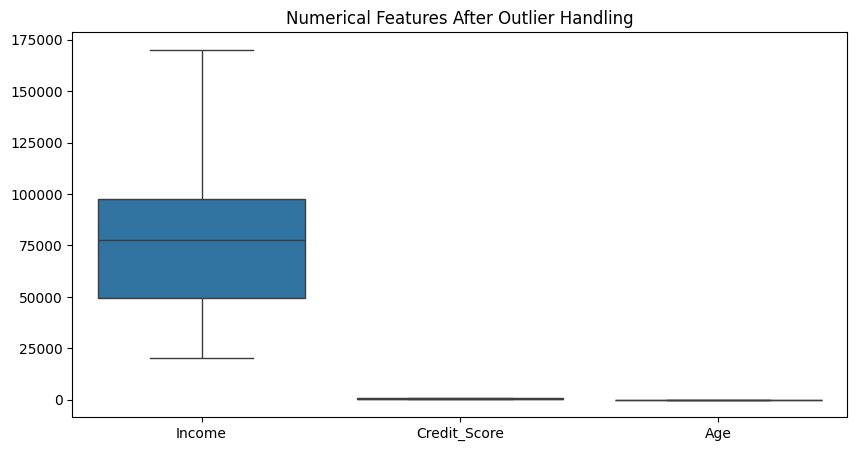

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numerical_features])
plt.title("Numerical Features After Outlier Handling")
plt.show()

### Encoding Categorical Variable

In [15]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_features = ['Employment_Status', 'Education_Level']
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
df = df.drop(columns=categorical_features).join(encoded_df)

In [16]:
df

,ID,Age,Income,Credit_Score,Loan_Approval,Employment_Status_Self-Employed,Employment_Status_Unemployed,Education_Level_High School,Education_Level_Master,Education_Level_PhD
0,1,56,81228.000000,673.0,0,0.0,1.0,1.0,0.0,0.0
1,2,69,68984.000000,771.0,1,0.0,0.0,0.0,0.0,1.0
2,3,46,60774.000000,532.0,0,1.0,0.0,0.0,0.0,1.0
3,4,32,77590.318681,412.0,0,0.0,0.0,0.0,0.0,0.0
4,5,60,82592.000000,796.0,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,96,42,117504.000000,737.0,1,0.0,0.0,0.0,0.0,1.0
96,97,62,118098.000000,582.0,1,0.0,0.0,0.0,1.0,0.0
97,98,58,33545.000000,326.0,1,0.0,0.0,0.0,0.0,0.0
98,99,46,86199.000000,525.0,0,1.0,0.0,0.0,0.0,0.0


### Feature Engineering
### 1. Income per Age Ratio
### 2. Credit Age Ratio

In [17]:
df['Income_per_Age'] = df['Income'] / df['Age']
df['Credit_Age_Ratio'] = df['Credit_Score'] / df['Age']

In [18]:
df

,ID,Age,Income,Credit_Score,Loan_Approval,Employment_Status_Self-Employed,Employment_Status_Unemployed,Education_Level_High School,Education_Level_Master,Education_Level_PhD,Income_per_Age,Credit_Age_Ratio
0,1,56,81228.000000,673.0,0,0.0,1.0,1.0,0.0,0.0,1450.500000,12.017857
1,2,69,68984.000000,771.0,1,0.0,0.0,0.0,0.0,1.0,999.768116,11.173913
2,3,46,60774.000000,532.0,0,1.0,0.0,0.0,0.0,1.0,1321.173913,11.565217
3,4,32,77590.318681,412.0,0,0.0,0.0,0.0,0.0,0.0,2424.697459,12.875000
4,5,60,82592.000000,796.0,0,0.0,0.0,0.0,1.0,0.0,1376.533333,13.266667
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,42,117504.000000,737.0,1,0.0,0.0,0.0,0.0,1.0,2797.714286,17.547619
96,97,62,118098.000000,582.0,1,0.0,0.0,0.0,1.0,0.0,1904.806452,9.387097
97,98,58,33545.000000,326.0,1,0.0,0.0,0.0,0.0,0.0,578.362069,5.620690
98,99,46,86199.000000,525.0,0,1.0,0.0,0.0,0.0,0.0,1873.891304,11.413043


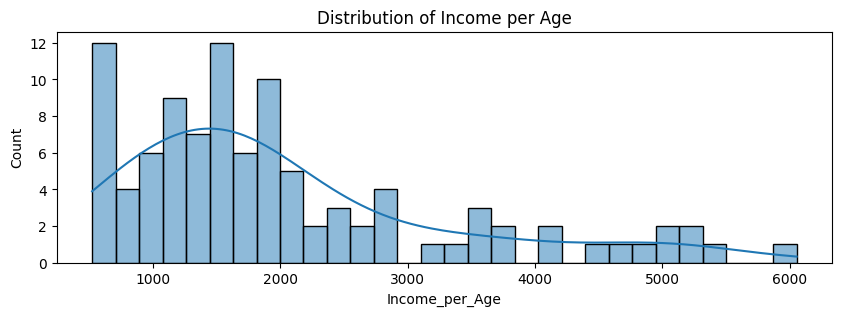

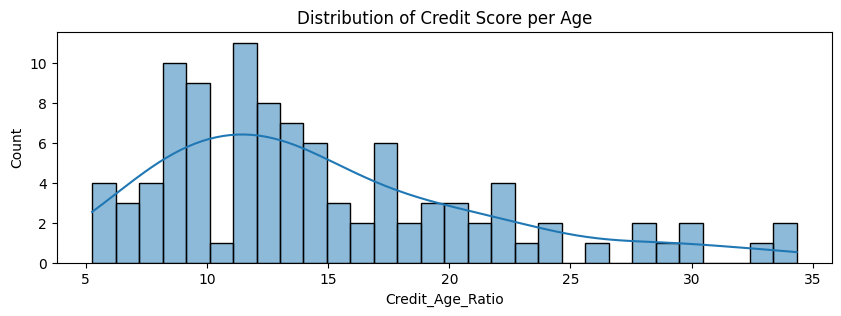

In [19]:
plt.figure(figsize=(10, 3))
sns.histplot(df['Income_per_Age'], bins=30, kde=True)
plt.title("Distribution of Income per Age")
plt.show()

plt.figure(figsize=(10, 3))
sns.histplot(df['Credit_Age_Ratio'], bins=30, kde=True)
plt.title("Distribution of Credit Score per Age")
plt.show()

### Handling Scalar with Min Max

In [20]:
scaler = MinMaxScaler()
df[['Age', 'Income', 'Credit_Score', 'Income_per_Age', 'Credit_Age_Ratio']] = scaler.fit_transform(df[['Age', 'Income', 'Credit_Score', 'Income_per_Age', 'Credit_Age_Ratio']])

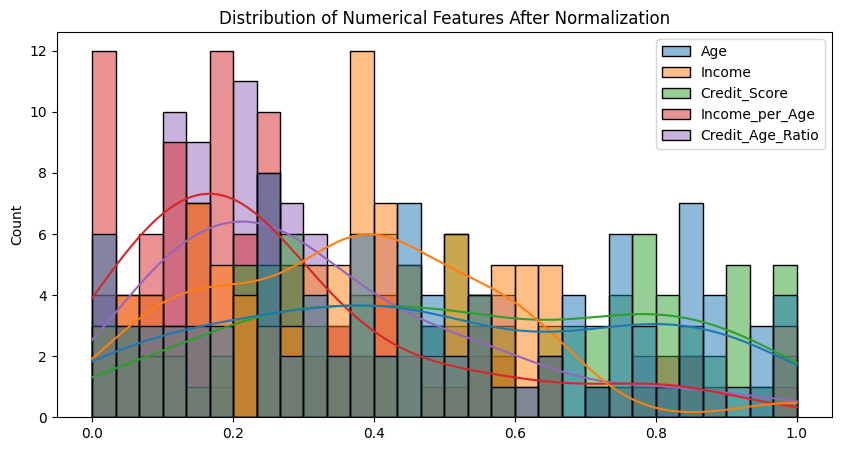

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df[['Age', 'Income', 'Credit_Score', 'Income_per_Age', 'Credit_Age_Ratio']], bins=30, kde=True)
plt.title("Distribution of Numerical Features After Normalization")
plt.show()

### Train Test Split

In [ ]:
X = df.drop(columns=['Loan_Approval'])
y = df['Loan_Approval']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Handling Class Imbalance

In [23]:
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("\n===== Final Processed Dataset Overview =====")
print(X_train_balanced.head())


===== Final Processed Dataset Overview =====
   ID   Age    Income  Credit_Score  Employment_Status_Self-Employed  \
0  89  0.38  0.365569      0.899804                              0.0   
1  98  0.78  0.088968      0.049116                              0.0   
2  14  0.68  0.411204      0.000000                              0.0   
3  63  0.66  0.621755      0.253438                              0.0   
4  39  0.84  0.180484      0.787819                              0.0   

   Employment_Status_Unemployed  Education_Level_High School  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          1.0   
4                           1.0                          0.0   

   Education_Level_Master  Education_Level_PhD  Income_per_Age  \
0                     1.0                  0.0        0.262172   
1   